<a href="https://colab.research.google.com/github/poojanmehta/marketing-campaign-prediction/blob/main/bank_marketing_campaign.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [14]:
import pandas as pd

In [15]:
df = pd.read_csv('/content/bank-additional-full.csv', sep = ';')

In [16]:
df.head()

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,duration,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
0,56,housemaid,married,basic.4y,no,no,no,telephone,may,mon,261,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
1,57,services,married,high.school,unknown,no,no,telephone,may,mon,149,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
2,37,services,married,high.school,no,yes,no,telephone,may,mon,226,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
3,40,admin.,married,basic.6y,no,no,no,telephone,may,mon,151,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
4,56,services,married,high.school,no,no,yes,telephone,may,mon,307,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no


In [17]:
list(df.columns)

['age',
 'job',
 'marital',
 'education',
 'default',
 'housing',
 'loan',
 'contact',
 'month',
 'day_of_week',
 'duration',
 'campaign',
 'pdays',
 'previous',
 'poutcome',
 'emp.var.rate',
 'cons.price.idx',
 'cons.conf.idx',
 'euribor3m',
 'nr.employed',
 'y']

In [18]:
df.isnull().sum()

## This data is aleady cleaned and missing values are handeled

age               0
job               0
marital           0
education         0
default           0
housing           0
loan              0
contact           0
month             0
day_of_week       0
duration          0
campaign          0
pdays             0
previous          0
poutcome          0
emp.var.rate      0
cons.price.idx    0
cons.conf.idx     0
euribor3m         0
nr.employed       0
y                 0
dtype: int64

In [19]:
## stastistical imformation for numerical features

df.describe()

,age,duration,campaign,pdays,previous,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed
count,41188.00000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000
mean,40.02406,258.285010,2.567593,962.475454,0.172963,0.081886,93.575664,-40.502600,3.621291,5167.035911
std,10.42125,259.279249,2.770014,186.910907,0.494901,1.570960,0.578840,4.628198,1.734447,72.251528
min,17.00000,0.000000,1.000000,0.000000,0.000000,-3.400000,92.201000,-50.800000,0.634000,4963.600000
25%,32.00000,102.000000,1.000000,999.000000,0.000000,-1.800000,93.075000,-42.700000,1.344000,5099.100000
50%,38.00000,180.000000,2.000000,999.000000,0.000000,1.100000,93.749000,-41.800000,4.857000,5191.000000
75%,47.00000,319.000000,3.000000,999.000000,0.000000,1.400000,93.994000,-36.400000,4.961000,5228.100000
max,98.00000,4918.000000,56.000000,999.000000,7.000000,1.400000,94.767000,-26.900000,5.045000,5228.100000


In [20]:
## same statistical information but only for successful deals
df[df['y'] == 'yes'].describe()

,age,duration,campaign,pdays,previous,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed
count,4640.000000,4640.000000,4640.000000,4640.000000,4640.000000,4640.000000,4640.000000,4640.000000,4640.000000,4640.000000
mean,40.913147,553.191164,2.051724,792.035560,0.492672,-1.233448,93.354386,-39.789784,2.123135,5095.115991
std,13.837476,401.171871,1.666245,403.407181,0.860344,1.623626,0.676644,6.139668,1.742598,87.572641
min,17.000000,37.000000,1.000000,0.000000,0.000000,-3.400000,92.201000,-50.800000,0.634000,4963.600000
25%,31.000000,253.000000,1.000000,999.000000,0.000000,-1.800000,92.893000,-46.200000,0.849000,5017.500000
50%,37.000000,449.000000,2.000000,999.000000,0.000000,-1.800000,93.200000,-40.400000,1.266000,5099.100000
75%,50.000000,741.250000,2.000000,999.000000,1.000000,-0.100000,93.918000,-36.100000,4.406000,5191.000000
max,98.000000,4199.000000,23.000000,999.000000,6.000000,1.400000,94.767000,-26.900000,5.045000,5228.100000


In [21]:
## same statistical information but only for failed deals
df[df['y'] == 'no'].describe()

# 1. more variance in age variable than success
# 2. mean of duration is very less than success(553.20) it has (220.84)
# 3. more variance in campaign than success

,age,duration,campaign,pdays,previous,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed
count,36548.000000,36548.000000,36548.000000,36548.000000,36548.000000,36548.000000,36548.000000,36548.000000,36548.000000,36548.000000
mean,39.911185,220.844807,2.633085,984.113878,0.132374,0.248875,93.603757,-40.593097,3.811491,5176.166600
std,9.898132,207.096293,2.873438,120.656868,0.409199,1.482932,0.558993,4.391155,1.638187,64.571979
min,17.000000,0.000000,1.000000,0.000000,0.000000,-3.400000,92.201000,-50.800000,0.634000,4963.600000
25%,32.000000,95.000000,1.000000,999.000000,0.000000,-1.800000,93.075000,-42.700000,1.405000,5099.100000
50%,38.000000,163.500000,2.000000,999.000000,0.000000,1.100000,93.918000,-41.800000,4.857000,5195.800000
75%,47.000000,279.000000,3.000000,999.000000,0.000000,1.400000,93.994000,-36.400000,4.962000,5228.100000
max,95.000000,4918.000000,56.000000,999.000000,7.000000,1.400000,94.767000,-26.900000,5.045000,5228.100000


In [22]:
# Check target variable

print('Target variable options :- ', list(df['y'].unique()))
print('\n\n\nCounts :- \n', df['y'].value_counts())

Target variable options :-  ['no', 'yes']



Counts :- 
 no     36548
yes     4640
Name: y, dtype: int64


In [23]:
# Check any column that has massive influence on result
# category and numeric columns correlation

In [24]:
## split x and y

x = df.drop(['y'], axis=1).copy()
y = df['y'].copy()

In [25]:
## format data

# one-hot encoding

# print all the column with categorical data
cat_cols = x.select_dtypes(include='object')

# check how many unique categories in each column
for col in cat_cols.columns:
  print(col, ' : ', len(x[col].unique()))

x = pd.get_dummies(x, columns = list(cat_cols.columns))

job  :  12
marital  :  4
education  :  8
default  :  3
housing  :  3
loan  :  3
contact  :  2
month  :  10
day_of_week  :  5
poutcome  :  3


In [26]:
# Convert categorical output variable into boolean (0, 1)

from sklearn.preprocessing import LabelEncoder

lbl_enc = LabelEncoder()
y = lbl_enc.fit(['no', 'yes']).transform(y)

In [27]:
# check balance of vales in successful and failed deals

print('Successful deals :- ', round((sum(y)/len(y))*100, 2), '%')

# we will need same amount of balance of both output variables in testing and training split

Successful deals :-  11.27 %


In [28]:
# split data into train and test, use y for stratification

from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(x, y, random_state = 42, stratify=y)

print('Successful deals in training data :- ', round((sum(y_train)/len(y_train))*100, 2), '%')
print('Successful deals testing data :- ', round((sum(y_test)/len(y_test))*100, 2), '%')

Successful deals in training data :-  11.27 %
Successful deals testing data :-  11.27 %


In [29]:
# create a model without using cross-validation

from xgboost import XGBClassifier

xgb_clsf = XGBClassifier(objective = 'binary:logistic', missing=None, seed=42)

In [ ]:
# we are not using early stopping in this training

xgb_clsf.fit(x_train, y_train, verbose = True,eval_metric = 'aucpr', eval_set=[(x_test, y_test)])

# result - after creating 100 trees the maximum accuracy is 0.656

<Axes: title={'center': 'Feature importance'}, xlabel='F score', ylabel='Features'>

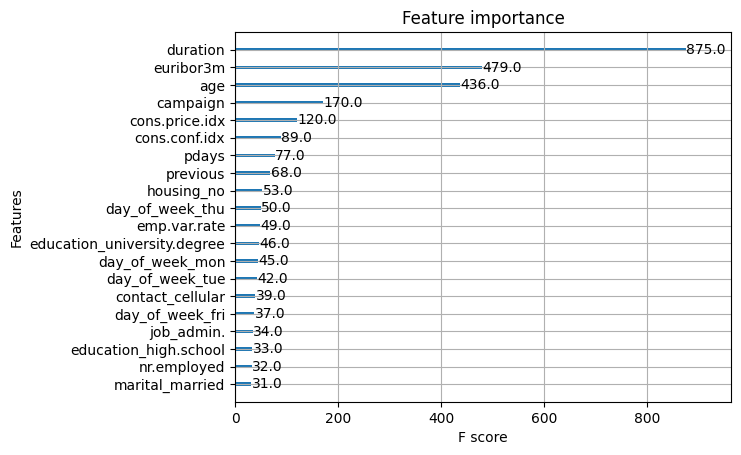

In [34]:
# plot the importance of each feture

from xgboost import plot_importance

plot_importance(xgb_clsf, max_num_features = 20)

In [32]:
# varify using confusion matirx